In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import sweetviz
from pandas_profiling import ProfileReport

In [26]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 45.3MB 1.1MB/s
     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 604kB 8.7MB/s 
     |████████████████████████████████| 3.1MB 35.4MB/s 
     |████████████████████████████████| 296kB 45.5MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=5e07c4037c84488977fd6f563e1eb58be02be4b432449466e3d6aa1ecf9d5655
  Stored in directory: /tmp/pip-ephem-wheel-cache-1qn7iwmn/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=a470e539126d305d76c2b80a29d4f6da73f561d3cd63e9251674484422647021
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=f7392a5412cd73edf32a3e9d6679ddad55c4585d533396d413371a35878eff2c
  Stored in directory: /root/.cache/pip/wh

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
/content/drive/My Drive/Project Future - Data & Decision Sciences by Code.hub/data/devices.csv

In [0]:
filenames = ['devices', 'notifications', 'transactions_1', 'transactions_2', 'transactions_3', 'users']

In [0]:
dataframes = [pd.read_csv('/content/drive/My Drive/Project Future - Data & Decision Sciences by Code.hub/data/' + filename + '.csv') for filename in filenames]
devices_df, notifications_df, transactions_1_df, transactions_2_df, transactions_3_df, users_df = dataframes

In [0]:
#merge transactions into 1 dataframe
transactions_df = pd.concat([transactions_1_df, transactions_2_df, transactions_3_df])

In [0]:
#merge devices_df on users1_df
users1_df = pd.merge(users_df, devices_df, on='user_id')

## EDA & transformations on notifications

In [7]:
notifications_df.sample(5)

reason channel  ...     user_id                created_date
10075        BLUE_TUESDAY    PUSH  ...   user_1817  2018-11-01 17:20:06.061777
31528  METAL_RESERVE_PLAN    PUSH  ...   user_5744  2018-10-18 05:35:54.135727
81914               PROMO   EMAIL  ...   user_1451  2019-02-04 13:55:03.281783
45019               PROMO    PUSH  ...  user_13243  2019-02-01 04:22:19.857486
81880               PROMO   EMAIL  ...  user_10598  2019-02-01 17:26:11.690215

[5 rows x 5 columns]

In [8]:
print(notifications_df['status'].unique())
print(notifications_df['channel'].unique())
print(notifications_df['reason'].unique())

['SENT' 'FAILED']
['PUSH' 'SMS' 'EMAIL']
['REENGAGEMENT_ACTIVE_FUNDS' 'BLUE_TUESDAY' 'NO_INITIAL_CARD_USE'
 'ENGAGEMENT_SPLIT_BILL_RESTAURANT' 'METAL_RESERVE_PLAN'
 'ONBOARDING_TIPS_ACTIVATED_USERS' 'MADE_MONEY_REQUEST_NOT_SPLIT_BILL'
 'SILVER_ENGAGEMENT_INACTIVE_CARD' 'NO_INITIAL_CARD_ORDER'
 'SILVER_ENGAGEMENT_FEES_SAVED' 'PROMO' 'WELCOME_BACK' 'PROMO_CARD_ORDER'
 'LOST_CARD_ORDER' 'BLACK_FRIDAY' 'INVEST_IN_GOLD' 'JOINING_ANNIVERSARY']


In [9]:
profile = ProfileReport(notifications_df, minimal=True)
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:385: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


In [0]:
#keep only sent notifications
notifications1_df = notifications_df[notifications_df['status'] == 'SENT'].copy()

In [0]:
#pd.options.mode.chained_assignment = None

In [0]:
notifications1_df.drop(['status','created_date'],axis=1, inplace=True)

In [0]:
notifications1_df = pd.get_dummies(notifications1_df, columns=['reason','channel'])

In [0]:
notifications1_df = notifications1_df.groupby('user_id').sum()

In [15]:
notifications1_df

reason_BLACK_FRIDAY  reason_BLUE_TUESDAY  ...  channel_PUSH  channel_SMS
user_id                                              ...                           
user_0                       1                    0  ...             2            0
user_1                       0                    0  ...             5            0
user_10                      0                    0  ...             3            0
user_100                     0                    0  ...             3            0
user_1000                    0                    0  ...             0            0
...                        ...                  ...  ...           ...          ...
user_9995                    0                    0  ...             0            0
user_9996                    0                    0  ...             0            0
user_9997                    0                    0  ...             5            0
user_9998                    0                    0  ...             1            0
user_9999                    0                    0  ...             0            0

[14740 rows x 20 columns]

In [16]:
import numpy as np
corr_abs = notifications1_df.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

reason_METAL_RESERVE_PLAN               channel_SMS                                 0.950236
reason_REENGAGEMENT_ACTIVE_FUNDS        channel_PUSH                                0.888153
reason_NO_INITIAL_CARD_USE              channel_EMAIL                               0.450579
reason_LOST_CARD_ORDER                  reason_NO_INITIAL_CARD_USE                  0.421047
reason_ONBOARDING_TIPS_ACTIVATED_USERS  channel_EMAIL                               0.366999
                                                                                      ...   
reason_METAL_RESERVE_PLAN               reason_REENGAGEMENT_ACTIVE_FUNDS            0.001112
reason_INVEST_IN_GOLD                   reason_ONBOARDING_TIPS_ACTIVATED_USERS      0.001082
reason_LOST_CARD_ORDER                  reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL    0.000673
reason_BLUE_TUESDAY                     reason_INVEST_IN_GOLD                       0.000537
reason_NO_INITIAL_CARD_ORDER            reason_SILVER_ENGAGEMENT_INACT

## EDA & transformations on users

In [17]:
users1_df.head()

user_id  birth_year country  ... num_referrals num_successful_referrals  brand
0  user_0        1992      ES  ...             0                        0  Apple
1  user_1        1985      LT  ...             0                        0  Apple
2  user_2        1996      IE  ...             0                        0  Apple
3  user_3        1981      IE  ...             0                        0  Apple
4  user_4        1992      GB  ...             0                        0  Apple

[5 rows x 13 columns]

In [18]:
users1_df.isnull().sum()

user_id                                        0
birth_year                                     0
country                                        0
city                                           0
created_date                                   0
user_settings_crypto_unlocked                  0
plan                                           0
attributes_notifications_marketing_push     5260
attributes_notifications_marketing_email    5260
num_contacts                                   0
num_referrals                                  0
num_successful_referrals                       0
brand                                          0
dtype: int64

In [19]:
print(users1_df.num_referrals.nunique())
print(users1_df.num_successful_referrals.nunique())

1
1


In [0]:
#birth_year to age
users1_df['age'] = 2020 - users1_df['birth_year']
users1_df.drop(['birth_year'],axis=1, inplace=True)

In [21]:
profile = ProfileReport(users1_df, minimal=True)
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:385: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


In [0]:
users1_df.drop(['num_referrals','num_successful_referrals','city','created_date'],axis=1, inplace=True)

In [23]:
users1_df

user_id country  ...    brand age
0          user_0      ES  ...    Apple  28
1          user_1      LT  ...    Apple  35
2          user_2      IE  ...    Apple  24
3          user_3      IE  ...    Apple  39
4          user_4      GB  ...    Apple  28
...           ...     ...  ...      ...  ..
15539  user_15539      PL  ...  Android  23
15540  user_15540      PL  ...    Apple  35
15541  user_15541      GB  ...  Android  42
15542  user_15542      IE  ...    Apple  43
15543  user_15543      GB  ...  Android  26

[15544 rows x 9 columns]

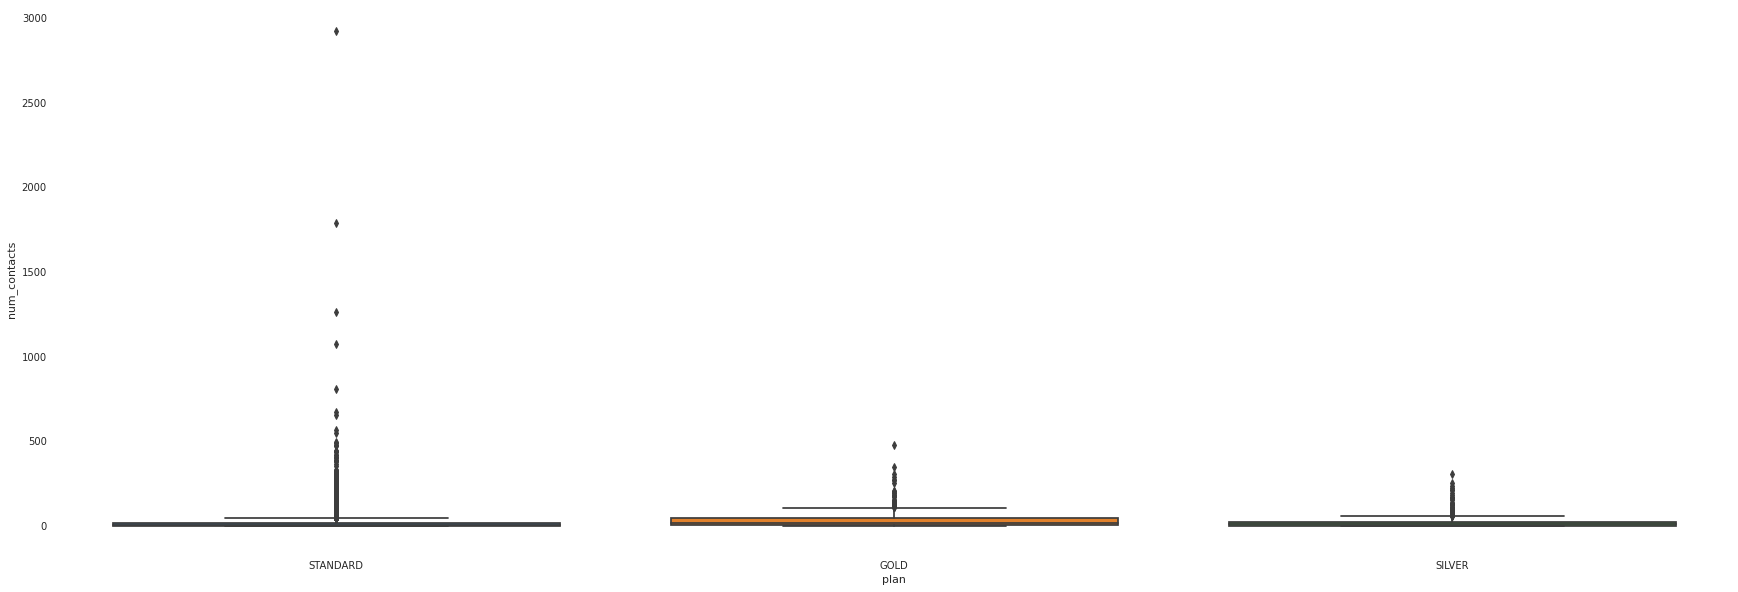

In [24]:
#check and remove outliers
plt.figure(figsize=(30, 10))
chart = sns.boxplot(x='plan',y='num_contacts', data=users1_df)

In [25]:
users1_df[users1_df['num_contacts']>800]

user_id country  ...    brand age
3802    user_3802      IE  ...  Android  33
4756    user_4756      LT  ...    Apple  32
4854    user_4854      MT  ...    Apple  37
6836    user_6836      MT  ...    Apple  34
14860  user_14860      MT  ...    Apple  45

[5 rows x 9 columns]

In [0]:
users1_df=users1_df[users1_df['num_contacts']<800]

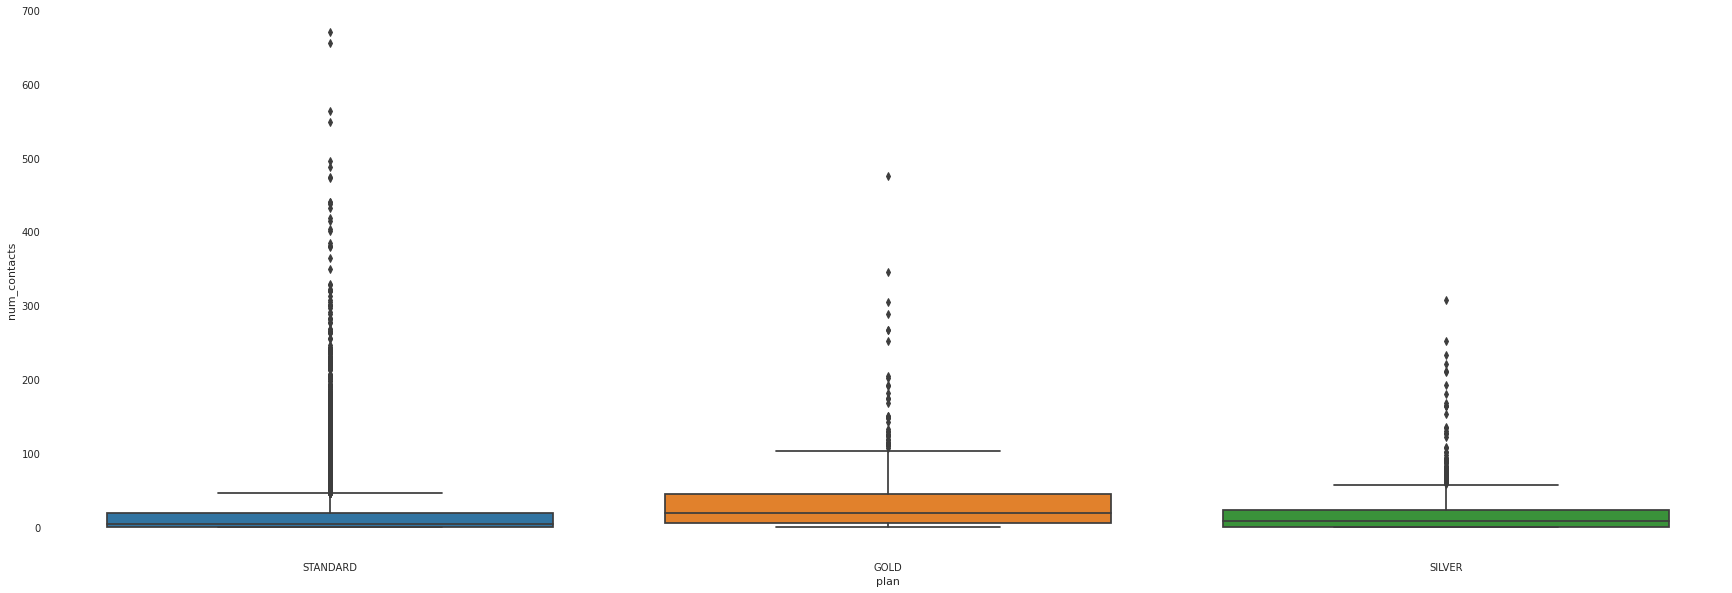

In [27]:
plt.figure(figsize=(30, 10))
chart = sns.boxplot(x='plan',y='num_contacts', data=users1_df)

## EDA & transformations on transactions

In [28]:
transactions_df.sample(5)

transaction_id  ...                created_date
689098  transaction_689098  ...  2018-09-07 19:15:29.459428
508665  transaction_508665  ...  2019-02-11 08:18:23.401396
259700  transaction_259700  ...  2018-10-04 07:35:49.073576
26628   transaction_826628  ...  2019-03-16 01:34:35.365287
128269  transaction_928269  ...  2018-06-29 08:33:54.102737

[5 rows x 12 columns]

In [29]:
profile = ProfileReport(transactions_df, minimal=True)
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:385: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


In [30]:
transactions_df.isnull().sum()

transaction_id                0
transactions_type             0
transactions_currency         0
amount_usd                    0
transactions_state            0
ea_cardholderpresence    933206
ea_merchant_mcc          923975
ea_merchant_city         924080
ea_merchant_country      924239
direction                     0
user_id                       0
created_date                  0
dtype: int64

In [31]:
transactions_df.transactions_type.value_counts()

CARD_PAYMENT    1173661
TRANSFER         402126
TOPUP            309740
EXCHANGE         124800
ATM               74181
CASHBACK          65063
FEE               18786
CARD_REFUND        9209
TAX                2267
REFUND             1193
Name: transactions_type, dtype: int64

In [32]:
transactions_df.transactions_state.value_counts()

COMPLETED    1916387
DECLINED      124226
REVERTED       89330
FAILED         32566
PENDING        17153
CANCELLED       1364
Name: transactions_state, dtype: int64

In [33]:
transactions_df.direction.value_counts()

OUTBOUND    1759079
INBOUND      421947
Name: direction, dtype: int64

In [0]:
#keep only 'COMPLETED' transactions
completed_transactions_df = transactions_df[transactions_df['transactions_state'] == 'COMPLETED']

In [35]:
completed_transactions_df.transactions_type.value_counts()

CARD_PAYMENT    999418
TRANSFER        396323
TOPUP           242621
EXCHANGE        124800
ATM              61518
CASHBACK         60278
FEE              18786
CARD_REFUND       9208
TAX               2242
REFUND            1193
Name: transactions_type, dtype: int64

In [0]:
# drop 'EXCHANGE' transactions
completed_transactions_df=completed_transactions_df[completed_transactions_df['transactions_type']!='EXCHANGE']

In [0]:
# drop unneeded columns
completed_transactions_df.drop(['transaction_id','transactions_currency','transactions_state','ea_cardholderpresence','ea_merchant_mcc','ea_merchant_city','ea_merchant_country','created_date'],axis=1, inplace=True)

In [38]:
completed_transactions_df

transactions_type  amount_usd direction     user_id
0               TRANSFER        4.55  OUTBOUND   user_4368
1           CARD_PAYMENT       15.50  OUTBOUND   user_2355
2           CARD_PAYMENT       43.40  OUTBOUND   user_2355
3               TRANSFER    10043.01  OUTBOUND   user_2355
4           CARD_PAYMENT       43.81  OUTBOUND  user_14318
...                  ...         ...       ...         ...
681020          TRANSFER       46.81   INBOUND   user_1011
681022          TRANSFER        1.70  OUTBOUND   user_1011
681023          TRANSFER        4.26  OUTBOUND   user_3170
681024          TRANSFER        1.70  OUTBOUND   user_8195
681025          TRANSFER        4.26  OUTBOUND  user_10859

[1791587 rows x 4 columns]

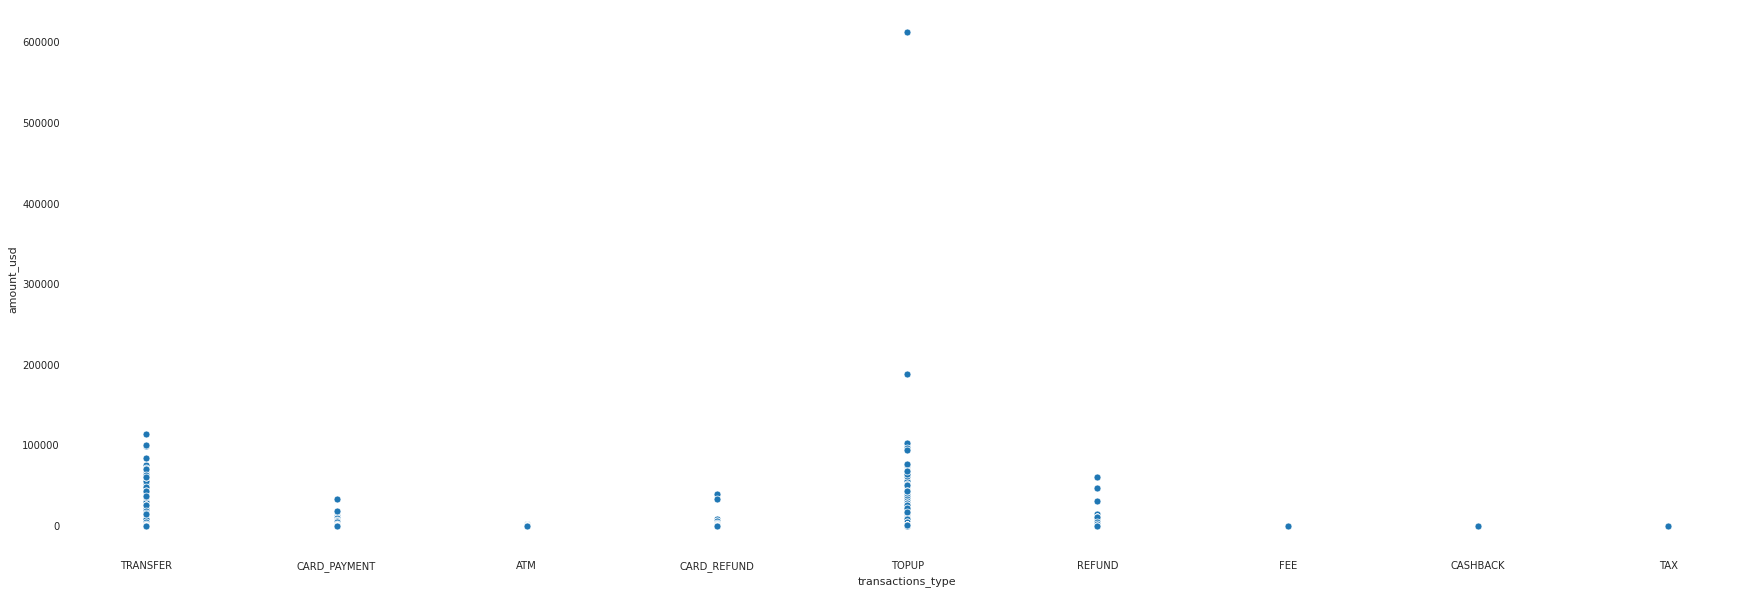

In [39]:
#check and remove outliers
plt.figure(figsize=(30, 10))
chart = sns.scatterplot(x='transactions_type',y='amount_usd', data=completed_transactions_df)

In [40]:
completed_transactions_df[completed_transactions_df['amount_usd']>150000]

transactions_type  amount_usd direction    user_id
589913             TOPUP   188665.72   INBOUND  user_2210
565359             TOPUP   612766.46   INBOUND   user_936

In [0]:
completed_transactions_df=completed_transactions_df[completed_transactions_df['amount_usd']<150000]

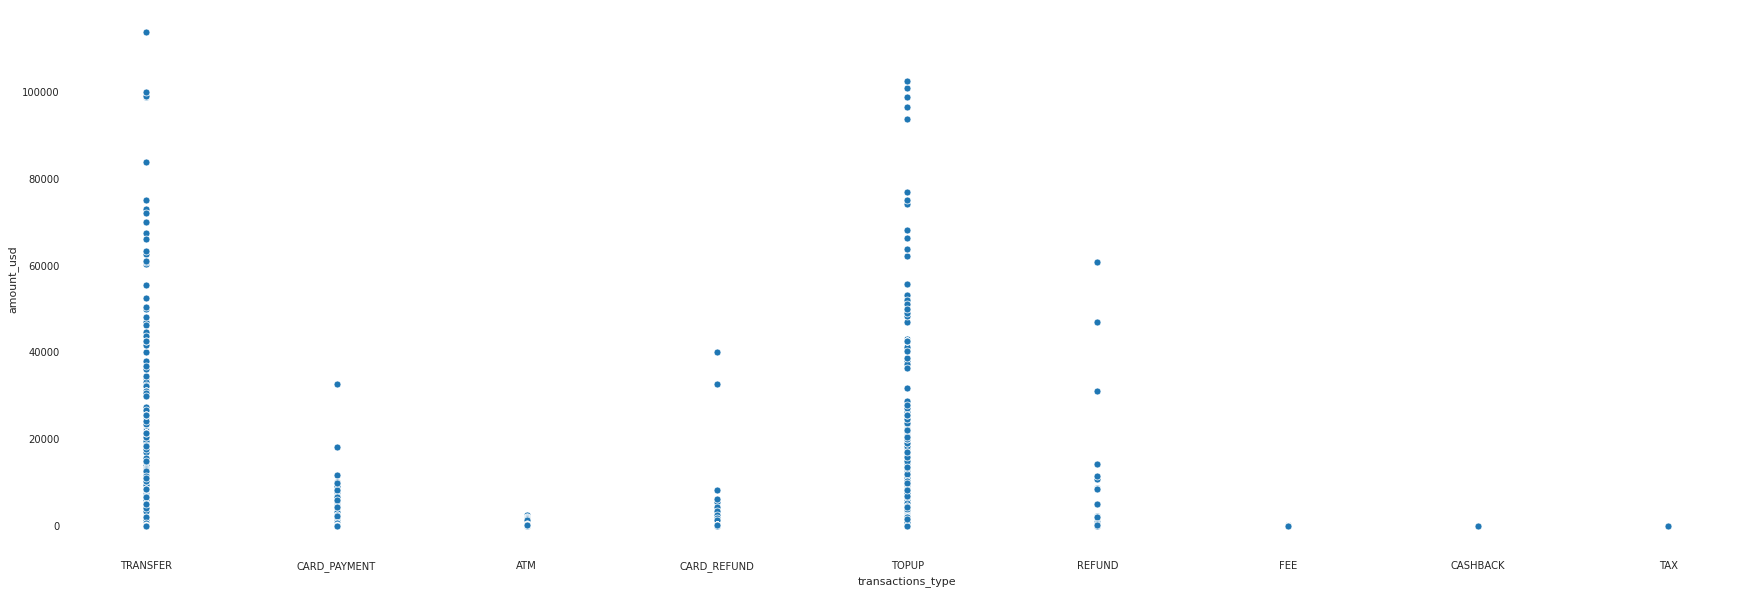

In [42]:
plt.figure(figsize=(30, 10))
chart = sns.scatterplot(x='transactions_type',y='amount_usd', data=completed_transactions_df)

In [0]:
# create a total usd feature for each user and subtract the refunds
transactions_tot = completed_transactions_df.groupby('user_id')[['amount_usd']].sum()

In [44]:
transactions_tot

amount_usd
user_id              
user_0        6741.88
user_1       12955.54
user_10       5437.70
user_100      4230.10
user_1000      843.12
...               ...
user_9995      187.16
user_9996     1181.76
user_9997     6585.30
user_9998      359.06
user_9999        8.51

[14816 rows x 1 columns]

In [0]:
refunds_df = completed_transactions_df[completed_transactions_df['transactions_type']=='REFUND'].groupby('user_id')[['amount_usd']].sum()
refunds_df = refunds_df.rename(columns={'amount_usd':'refunds'})

In [0]:
card_refunds_df = completed_transactions_df[completed_transactions_df['transactions_type']=='CARD_REFUND'].groupby('user_id')[['amount_usd']].sum()
card_refunds_df = card_refunds_df.rename(columns={'amount_usd':'card_refunds'})

In [47]:
print(card_refunds_df)
print(refunds_df)

            card_refunds
user_id                 
user_0             13.00
user_10           485.96
user_10008        118.22
user_10010        118.97
user_10027         29.94
...                  ...
user_9971           2.00
user_9979          30.42
user_9981           0.99
user_9989          14.47
user_9997          20.00

[3379 rows x 1 columns]
            refunds
user_id            
user_10048     5.10
user_10054    11.06
user_10065     3.38
user_10097     5.00
user_10103     5.10
...             ...
user_994       4.25
user_9942      5.37
user_9943     30.00
user_9948     10.20
user_9979      1.70

[859 rows x 1 columns]


In [0]:
transactions_tot = transactions_tot.merge(refunds_df, right_index=True, left_index=True, how='outer')
transactions_tot = transactions_tot.merge(card_refunds_df, right_index=True, left_index=True, how='outer')

In [49]:
transactions_tot

amount_usd  refunds  card_refunds
user_id                                     
user_0        6741.88      NaN         13.00
user_1       12955.54      NaN           NaN
user_10       5437.70      NaN        485.96
user_100      4230.10      NaN           NaN
user_1000      843.12      NaN           NaN
...               ...      ...           ...
user_9995      187.16      NaN           NaN
user_9996     1181.76      NaN           NaN
user_9997     6585.30      NaN         20.00
user_9998      359.06      NaN           NaN
user_9999        8.51      NaN           NaN

[14816 rows x 3 columns]

In [50]:
transactions_tot.isnull().sum()

amount_usd          0
refunds         13957
card_refunds    11437
dtype: int64

In [0]:
transactions_tot.fillna(0, inplace = True)

In [0]:
transactions_tot['usd_tot'] =transactions_tot['amount_usd']-transactions_tot['refunds']-transactions_tot['card_refunds']

In [53]:
transactions_tot

amount_usd  refunds  card_refunds   usd_tot
user_id                                               
user_0        6741.88      0.0         13.00   6728.88
user_1       12955.54      0.0          0.00  12955.54
user_10       5437.70      0.0        485.96   4951.74
user_100      4230.10      0.0          0.00   4230.10
user_1000      843.12      0.0          0.00    843.12
...               ...      ...           ...       ...
user_9995      187.16      0.0          0.00    187.16
user_9996     1181.76      0.0          0.00   1181.76
user_9997     6585.30      0.0         20.00   6565.30
user_9998      359.06      0.0          0.00    359.06
user_9999        8.51      0.0          0.00      8.51

[14816 rows x 4 columns]

In [0]:
#create a number of transactions feature for each user
num_transactions = completed_transactions_df.groupby('user_id')[['amount_usd']].count()

In [55]:
num_transactions.rename({'amount_usd': 'num_transactions'}, axis=1, inplace=True)
num_transactions

num_transactions
user_id                    
user_0                  515
user_1                  133
user_10                 120
user_100                 55
user_1000                43
...                     ...
user_9995                 3
user_9996                26
user_9997               108
user_9998                23
user_9999                 1

[14816 rows x 1 columns]

In [56]:
completed_transactions_df

transactions_type  amount_usd direction     user_id
0               TRANSFER        4.55  OUTBOUND   user_4368
1           CARD_PAYMENT       15.50  OUTBOUND   user_2355
2           CARD_PAYMENT       43.40  OUTBOUND   user_2355
3               TRANSFER    10043.01  OUTBOUND   user_2355
4           CARD_PAYMENT       43.81  OUTBOUND  user_14318
...                  ...         ...       ...         ...
681020          TRANSFER       46.81   INBOUND   user_1011
681022          TRANSFER        1.70  OUTBOUND   user_1011
681023          TRANSFER        4.26  OUTBOUND   user_3170
681024          TRANSFER        1.70  OUTBOUND   user_8195
681025          TRANSFER        4.26  OUTBOUND  user_10859

[1791585 rows x 4 columns]

In [0]:
transactions1_df = completed_transactions_df[['transactions_type','direction','user_id']]

In [58]:
transactions1_df

transactions_type direction     user_id
0               TRANSFER  OUTBOUND   user_4368
1           CARD_PAYMENT  OUTBOUND   user_2355
2           CARD_PAYMENT  OUTBOUND   user_2355
3               TRANSFER  OUTBOUND   user_2355
4           CARD_PAYMENT  OUTBOUND  user_14318
...                  ...       ...         ...
681020          TRANSFER   INBOUND   user_1011
681022          TRANSFER  OUTBOUND   user_1011
681023          TRANSFER  OUTBOUND   user_3170
681024          TRANSFER  OUTBOUND   user_8195
681025          TRANSFER  OUTBOUND  user_10859

[1791585 rows x 3 columns]

In [0]:
transactions1_df = pd.get_dummies(transactions1_df, columns=['transactions_type','direction'])
transactions1_df = transactions1_df.groupby('user_id').sum()

In [60]:
transactions1_df

transactions_type_ATM  ...  direction_OUTBOUND
user_id                           ...                    
user_0                       0.0  ...               352.0
user_1                       4.0  ...               106.0
user_10                      3.0  ...                68.0
user_100                     6.0  ...                44.0
user_1000                    1.0  ...                20.0
...                          ...  ...                 ...
user_9995                    0.0  ...                 2.0
user_9996                    1.0  ...                22.0
user_9997                    3.0  ...                75.0
user_9998                    1.0  ...                13.0
user_9999                    0.0  ...                 0.0

[14816 rows x 11 columns]

In [61]:
import numpy as np
corr_abs = transactions1_df.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

transactions_type_CARD_PAYMENT  direction_OUTBOUND                0.932972
transactions_type_CASHBACK      direction_INBOUND                 0.827732
transactions_type_TRANSFER      direction_OUTBOUND                0.816711
transactions_type_TOPUP         direction_INBOUND                 0.698997
                                direction_OUTBOUND                0.653952
transactions_type_CARD_PAYMENT  transactions_type_TOPUP           0.646987
direction_INBOUND               direction_OUTBOUND                0.644178
transactions_type_CARD_PAYMENT  direction_INBOUND                 0.638528
                                transactions_type_TRANSFER        0.563167
transactions_type_ATM           direction_OUTBOUND                0.488737
transactions_type_TRANSFER      direction_INBOUND                 0.473275
transactions_type_TOPUP         transactions_type_TRANSFER        0.464321
transactions_type_ATM           transactions_type_TOPUP           0.456835
                         

## Create the final dataframe

In [0]:
#merge total amount usd on users1_df
users2_df = pd.merge(users1_df, transactions_tot['usd_tot'], on='user_id')

In [0]:
users2_df = pd.merge(users2_df, num_transactions, on='user_id')

In [64]:
users2_df 

user_id country  ...   usd_tot num_transactions
0          user_0      ES  ...   6728.88              515
1          user_1      LT  ...  12955.54              133
2          user_2      IE  ...   2723.90              268
3          user_3      IE  ...   6999.29              140
4          user_4      GB  ...    788.27               46
...           ...     ...  ...       ...              ...
14806  user_15539      PL  ...   3349.90               78
14807  user_15540      PL  ...     96.28               10
14808  user_15541      GB  ...  17595.83             1057
14809  user_15542      IE  ...    408.72               23
14810  user_15543      GB  ...   2653.80              437

[14811 rows x 11 columns]

In [0]:
country_df = users2_df.groupby('country').usd_tot.sum()
country_df = pd.merge(country_df , users2_df.groupby('country').user_id.count().reset_index(), on='country')

In [66]:
country_df.rename({'user_id': 'tot_users'}, axis=1, inplace=True)
country_df

country      usd_tot  tot_users
0       AT    314652.35         64
1       AU        66.61          3
2       BE    408137.28         99
3       BG    188139.47         67
4       CH   3694553.28        336
5       CY   1013843.83        141
6       CZ   1292294.76        273
7       DE   2729213.74        324
8       DK    499452.41         72
9       EE    100481.11         26
10      ES   4158947.39        757
11      FI    156184.61         32
12      FR  11156456.90       1604
13      GB  39148552.09       4831
14      GG     52442.68         14
15      GI    266252.98         34
16      GP     40724.13          9
17      GR    556269.91        145
18      HR    105010.30         43
19      HU    365622.15        115
20      IE   6789188.34        973
21      IM     24892.81          7
22      IS     10588.35          5
23      IT   1605126.85        226
24      JE    277242.20         44
25      LI      8836.44          4
26      LT   1732116.71        491
27      LU    235226.09         20
28      LV    526383.07        121
29      MQ     18173.66          3
30      MT   2979390.17        428
31      NL   1299995.34        120
32      NO    506857.25         71
33      PL   6797345.90       1790
34      PT   1788975.81        460
35      RE     58796.46          7
36      RO   5396299.52        824
37      SE    655374.40         97
38      SI    212139.42         69
39      SK    429299.45         62

In [67]:
import numpy as np
corr_abs = country_df.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

usd_tot  tot_users    0.980589
dtype: float64

In [0]:
users2_df.drop(['country'],axis=1, inplace=True)

In [69]:
users2_df.brand.value_counts()

Android    7403
Apple      7376
Unknown      32
Name: brand, dtype: int64

In [0]:
#remove Unknown brand rows
users2_df = users2_df[users2_df['brand']!='Unknown']

In [71]:
#users plan split depending on attributes_notifications
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

df1 = pd.crosstab(index=users2_df['plan'], columns=users2_df['attributes_notifications_marketing_push'])
df2 = pd.crosstab(index=users2_df['plan'], columns=users2_df['attributes_notifications_marketing_email'])

display_side_by_side(df1,df2)

attributes_notifications_marketing_push 
 0.0 
 1.0 
 
 
 plan 
 
 
 
 
 
 
 GOLD 
 14 
 360 
 
 
 SILVER 
 32 
 417 
 
 
 STANDARD 
 476 
 8294 
 
 
 
 
 
 attributes_notifications_marketing_email 
 0.0 
 1.0 
 
 
 plan 
 
 
 
 
 
 
 GOLD 
 21 
 353 
 
 
 SILVER 
 50 
 399 
 
 
 STANDARD 
 938 
 7832

In [72]:
users2_df.isnull().sum()

user_id                                        0
user_settings_crypto_unlocked                  0
plan                                           0
attributes_notifications_marketing_push     5186
attributes_notifications_marketing_email    5186
num_contacts                                   0
brand                                          0
age                                            0
usd_tot                                        0
num_transactions                               0
dtype: int64

In [73]:
users2_df.fillna(1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [0]:
#plan enc
def plan_enc(x):
    if x == 'STANDARD':
        return 0
    elif x == 'SILVER':
        return 1
    else:
        return 1

In [75]:
users2_df['plan'] = users2_df['plan'].apply(plan_enc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
#devices one hot
users2_df = pd.concat([users2_df,pd.get_dummies(users2_df['brand'], prefix='brand')],axis=1)
users2_df.drop(['brand'],axis=1, inplace=True)

In [77]:
users2_df

user_id  user_settings_crypto_unlocked  ...  brand_Android  brand_Apple
0          user_0                              0  ...              0            1
1          user_1                              1  ...              0            1
2          user_2                              0  ...              0            1
3          user_3                              0  ...              0            1
4          user_4                              0  ...              0            1
...           ...                            ...  ...            ...          ...
14806  user_15539                              0  ...              1            0
14807  user_15540                              0  ...              0            1
14808  user_15541                              0  ...              1            0
14809  user_15542                              0  ...              0            1
14810  user_15543                              1  ...              1            0

[14779 rows x 11 columns]

In [78]:
profile = ProfileReport(users2_df, minimal=True)
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:385: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


In [79]:
import numpy as np
corr_abs = users2_df.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

brand_Android                             brand_Apple                                 1.000000
attributes_notifications_marketing_push   attributes_notifications_marketing_email    0.615311
usd_tot                                   num_transactions                            0.323924
plan                                      num_transactions                            0.318773
                                          usd_tot                                     0.295409
user_settings_crypto_unlocked             plan                                        0.243152
                                          num_transactions                            0.196330
num_contacts                              num_transactions                            0.132662
age                                       num_transactions                            0.105554
user_settings_crypto_unlocked             usd_tot                                     0.082454
                                          age     

## Merge all encoded dataframes

In [0]:
users3_df = pd.merge(users2_df, notifications1_df, left_on='user_id',right_index = True, how='left')

In [0]:
users3_df = pd.merge(users3_df, transactions1_df, left_on='user_id',right_index = True, how='left')

In [82]:
users3_df.isna().sum()

user_id                                       0
user_settings_crypto_unlocked                 0
plan                                          0
attributes_notifications_marketing_push       0
attributes_notifications_marketing_email      0
num_contacts                                  0
age                                           0
usd_tot                                       0
num_transactions                              0
brand_Android                                 0
brand_Apple                                   0
reason_BLACK_FRIDAY                         740
reason_BLUE_TUESDAY                         740
reason_ENGAGEMENT_SPLIT_BILL_RESTAURANT     740
reason_INVEST_IN_GOLD                       740
reason_JOINING_ANNIVERSARY                  740
reason_LOST_CARD_ORDER                      740
reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL    740
reason_METAL_RESERVE_PLAN                   740
reason_NO_INITIAL_CARD_ORDER                740
reason_NO_INITIAL_CARD_USE              

In [83]:
users3_df.fillna(0, inplace = True)
users3_df

user_id  ...  direction_OUTBOUND
0          user_0  ...               352.0
1          user_1  ...               106.0
2          user_2  ...               225.0
3          user_3  ...               126.0
4          user_4  ...                37.0
...           ...  ...                 ...
14806  user_15539  ...                45.0
14807  user_15540  ...                 6.0
14808  user_15541  ...               978.0
14809  user_15542  ...                13.0
14810  user_15543  ...               395.0

[14779 rows x 42 columns]

In [0]:
users3_df.drop(['user_id'],axis=1, inplace=True)

In [85]:
import numpy as np
corr_abs = users3_df.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

brand_Android                            brand_Apple                         1.000000
num_transactions                         direction_OUTBOUND                  0.983001
reason_METAL_RESERVE_PLAN                channel_SMS                         0.949890
transactions_type_CARD_PAYMENT           direction_OUTBOUND                  0.932904
num_transactions                         transactions_type_CARD_PAYMENT      0.926178
                                                                               ...   
plan                                     reason_PROMO_CARD_ORDER             0.000139
reason_WELCOME_BACK                      transactions_type_REFUND            0.000101
reason_METAL_RESERVE_PLAN                reason_REENGAGEMENT_ACTIVE_FUNDS    0.000095
attributes_notifications_marketing_push  num_contacts                        0.000092
reason_INVEST_IN_GOLD                    transactions_type_CARD_PAYMENT      0.000088
Length: 820, dtype: float64

## Perform a test plan prediction including 'unrealistic' features

In [0]:
X = users3_df.loc[:, users3_df.columns != 'plan']
y = users3_df['plan']

In [0]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [88]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
rf = RandomForestClassifier(max_depth=150,n_estimators=150, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

print(rf.feature_importances_)

preds = rf.predict(X_test)

print(classification_report(y_test, rf.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[8.27418684e-02 1.05751990e-03 1.22758036e-03 1.03977892e-02
 7.59327406e-03 4.69527318e-02 2.33447548e-02 1.09848825e-02
 1.46946134e-02 1.20366691e-02 4.87491034e-04 4.62424588e-03
 1.54405305e-02 4.62303160e-03 6.35787509e-03 2.12072151e-03
 2.55315675e-04 8.77701669e-03 1.47013592e-02 1.61029525e-02
 5.56891478e-03 1.85600931e-03 4.84487775e-03 5.22002777e-02
 1.13406116e-01 1.06050796e-03 1.57939013e-02 8.77910547e-03
 5.60694745e-04 1.50414437e-02 9.27009007e-03 6.28762422e-03
 1.25871806e-01 2.64737532e-01 1.44430249e-02 4.28452101e-04
 9.25475271e-03 1.09416953e-02 3.45022786e-02 2.06286725e-02]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2726
           1       0.80      0.78      0.79       230

    accuracy                           0.97      2956
   macro avg       0.89      0.88      0.89      2956
weighted avg       0.97      0.97      0.97      2956



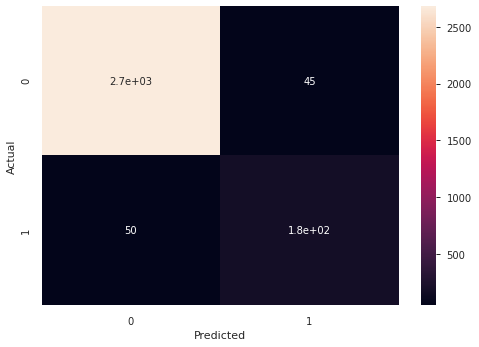

In [89]:
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Text(0.5, 0, 'Relative Importance')

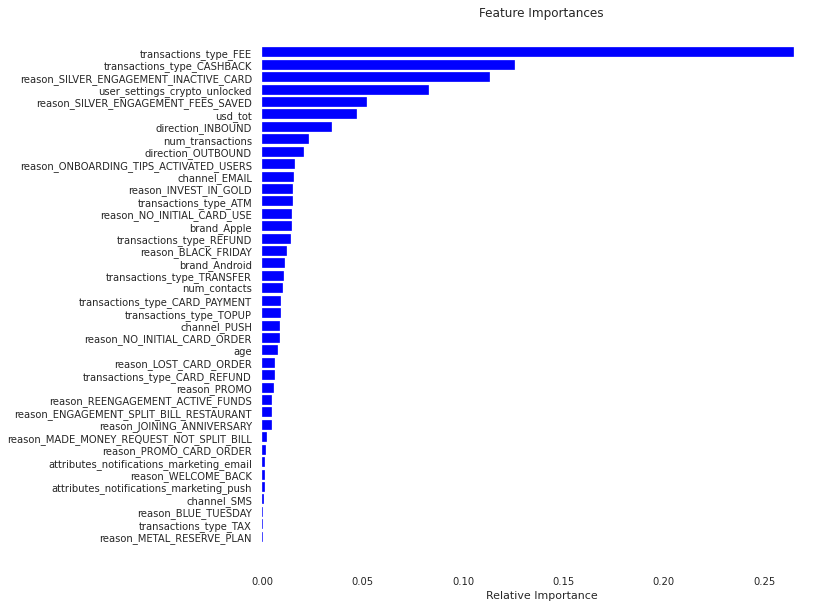

In [90]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Keep 'realistic' features and proceed to the actual prediction model

In [0]:
users4_df = users3_df.copy()

In [0]:
users4_df.drop(['brand_Apple','brand_Android','reason_ENGAGEMENT_SPLIT_BILL_RESTAURANT',
                'reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL',
                'reason_SILVER_ENGAGEMENT_FEES_SAVED','reason_SILVER_ENGAGEMENT_INACTIVE_CARD','transactions_type_TAX',
                'channel_SMS','reason_METAL_RESERVE_PLAN', 'reason_BLUE_TUESDAY', 'attributes_notifications_marketing_push',
               'user_settings_crypto_unlocked', 'reason_WELCOME_BACK', 'attributes_notifications_marketing_email', 
               'reason_PROMO_CARD_ORDER', 'num_contacts', 'reason_JOINING_ANNIVERSARY'],axis=1, inplace=True)

In [93]:
users4_df

plan  age  ...  direction_INBOUND  direction_OUTBOUND
0         0   28  ...              163.0               352.0
1         0   35  ...               27.0               106.0
2         0   24  ...               43.0               225.0
3         0   39  ...               14.0               126.0
4         0   28  ...                9.0                37.0
...     ...  ...  ...                ...                 ...
14806     0   23  ...               33.0                45.0
14807     0   35  ...                4.0                 6.0
14808     0   42  ...               79.0               978.0
14809     1   43  ...               10.0                13.0
14810     0   26  ...               42.0               395.0

[14779 rows x 24 columns]

In [94]:
X = users4_df.loc[:, users4_df.columns != 'plan']
y = users4_df['plan']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
rf = RandomForestClassifier(max_depth=150,n_estimators=150, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

print(rf.feature_importances_)

preds = rf.predict(X_test)

print(classification_report(y_test, rf.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.01320842 0.06353958 0.03262603 0.02109834 0.0233592  0.00762899
 0.02332715 0.03075612 0.03312815 0.01384953 0.01338865 0.02787061
 0.02324583 0.01987104 0.01117808 0.01513868 0.12947159 0.36405823
 0.02357915 0.01756015 0.01672414 0.04729962 0.02809273]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2726
           1       0.73      0.77      0.75       230

    accuracy                           0.96      2956
   macro avg       0.86      0.87      0.86      2956
weighted avg       0.96      0.96      0.96      2956



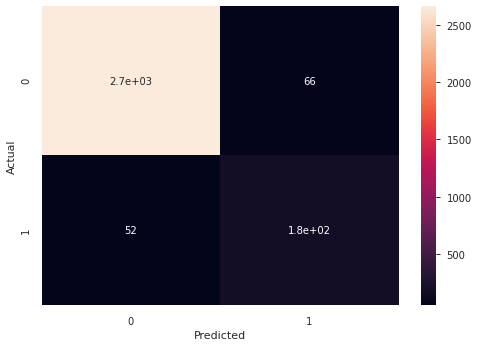

In [95]:
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Text(0.5, 0, 'Relative Importance')

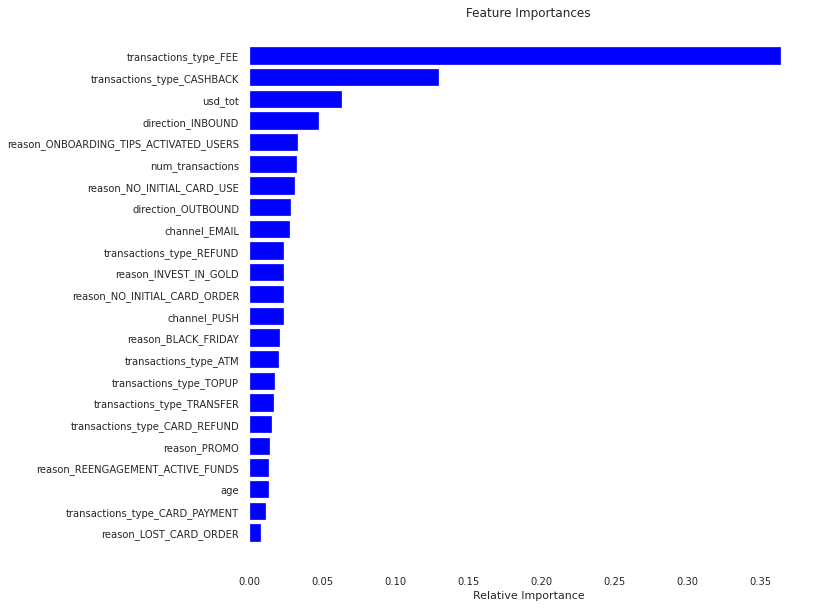

In [96]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [0]:
import folium

In [100]:
transactions_tot

amount_usd  refunds  card_refunds   usd_tot
user_id                                               
user_0        6741.88      0.0         13.00   6728.88
user_1       12955.54      0.0          0.00  12955.54
user_10       5437.70      0.0        485.96   4951.74
user_100      4230.10      0.0          0.00   4230.10
user_1000      843.12      0.0          0.00    843.12
...               ...      ...           ...       ...
user_9995      187.16      0.0          0.00    187.16
user_9996     1181.76      0.0          0.00   1181.76
user_9997     6585.30      0.0         20.00   6565.30
user_9998      359.06      0.0          0.00    359.06
user_9999        8.51      0.0          0.00      8.51

[14816 rows x 4 columns]

In [0]:
users_countries = pd.merge(users_df, transactions_tot, right_index=True, left_on='user_id')

In [105]:
users_countries.head()

user_id  birth_year country  ... refunds card_refunds   usd_tot
0  user_0        1992      ES  ...     0.0         13.0   6728.88
1  user_1        1985      LT  ...     0.0          0.0  12955.54
2  user_2        1996      IE  ...     0.0          0.0   2723.90
3  user_3        1981      IE  ...     0.0          0.0   6999.29
4  user_4        1992      GB  ...     0.0         29.0    788.27

[5 rows x 16 columns]

In [0]:
# users_usd_per_country = users_countries.groupby('country')['usd_tot'].sum().reset_index().sort_values(by='usd_tot', ascending = False)

In [116]:
# users_usd_per_country.head()

country      usd_tot
13      GB  39148552.09
12      FR  11156456.90
33      PL   6797345.90
20      IE   6793765.50
36      RO   5396299.52

In [0]:
world_geojson = '/content/drive/My Drive/Project Future - Data & Decision Sciences by Code.hub/data/world_map.json'

In [122]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[100, 0], zoom_start=1.5)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
map.choropleth(geo_data=world_geojson, data=country_df,
             columns=['country', 'usd_tot'],
             key_on='feature.properties.iso_a2',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             )

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [123]:
map

In [126]:
country_df.head()

country     usd_tot  tot_users
0      AT   314652.35         64
1      AU       66.61          3
2      BE   408137.28         99
3      BG   188139.47         67
4      CH  3694553.28        336

In [124]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[100, 0], zoom_start=1.5)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
map.choropleth(geo_data=world_geojson, data=country_df,
             columns=['country', 'tot_users'],
             key_on='feature.properties.iso_a2',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             )

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [125]:
map